In [1]:
# Code to plot the HI Mass function for different M virial mass ranges
from Functions import *

#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)

#convert to appropriate units
gals["Mvir"] = np.log10(gals["Mvir"]*1e10)
print(gals["Mvir"])
mvir_MIN = min(gals["Mvir"])
mvir_MAX = max(gals["Mvir"])
print('mvir_MIN = ', mvir_MIN)
print('mvir_MAX = ', mvir_MAX)

gals["HIMass"] = np.log10(gals["HIMass"]*1e10)
himass_MIN = min(gals["HIMass"])
himass_MAX = max(gals["HIMass"])
print('himass_MIN = ', himass_MIN)
print('himass_MAX = ', himass_MAX)

# Get the Type of Galaxies
#Type = gals["Type"] NOT NEEDED AS FUNCTION USED

# create arrays for different masses
gals_a =[] # MHI Mo <= 10 
gals_b =[] # 10 < MHI Mo <= 12
gals_c =[] # 12 < MHI Mo <= 14
gals_d =[] # MHI Mo > 14 


0          10.410791
1          10.374162
2          11.534210
3           9.984822
4          10.374162
             ...    
1648362     9.782402
1648363     9.782402
1648364     9.782402
1648365     9.782402
1648366     9.782402
Name: Mvir, Length: 1648367, dtype: float64
mvir_MIN =  9.782402184015774
mvir_MAX =  15.319856475794476


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


himass_MIN =  -inf
himass_MAX =  11.80157190728378


In [2]:
# Get gals for certain ranges of halo mass
gals_a = gals[gals["Mvir"] <= 10.0]
gals_b = gals[(gals["Mvir"] > 10.0) & (gals["Mvir"] <= 12.0)]
gals_c = gals[(gals["Mvir"] > 12.0) & (gals["Mvir"] <= 14.0)]
gals_d = gals[gals["Mvir"] > 14.0]

#print('gals_a: ', gals_a, '\nno. items: ', gals_a.shape)
#print('gals_b: ', gals_b, '\nno. items: ', gals_b.shape)
#print('gals_c: ', gals_c, '\nno. items: ', gals_c.shape)
#print('gals_d: ', gals_d, '\nno. items: ', gals_d.shape)

In [3]:
# Calculate the HIMF for the different Mvir ranges for ALL galaxies
range_in = (5.5, 11.5)
himf = ALICE_mass_function(gals["HIMass"],  sim_props["Volume"], bins=50, range=range_in) # ALL GALS
himf_a = ALICE_mass_function(gals_a["HIMass"],  sim_props["Volume"], bins=50, range=range_in) # ALL GALS
himf_b = ALICE_mass_function(gals_b["HIMass"],  sim_props["Volume"], bins=50, range=range_in) # ALL GALS
himf_c = ALICE_mass_function(gals_c["HIMass"],  sim_props["Volume"], bins=50, range=range_in) # ALL GALS
himf_d = ALICE_mass_function(gals_d["HIMass"],  sim_props["Volume"], bins=50, range=range_in) # ALL GALS

snapshot_used = 250
snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = round(redshift_used, 1) # round float to nearest whole int
redshift_used = str(redshift_used)

N_gals  :  [  3650   4937   6327   8231  10545  13208  17059  21890  27908  35837
  46766  62149  83141 108466 131754 148411 152405 146191 129912 109999
  89036  70514  53703  39941  29249  20673  14036   9811   7224   5489
   4448   3456   2702   2015   1412    916    579    339    166     62
     28     12      7      7      3      7      5      1      0      2]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.1200000000000001
bin_center :  [ 5.56  5.68  5.8   5.92  6.04  6.16  6.28  6.4   6.52  6.64  6.76  6.88
  7.    7.12  7.24  7.36  7.48  7.6   7.72  7.84  7.96  8.08  8.2   8.32
  8.44  8.56  8.68  8.8   8.92  9.04  9.16  9.28  9.4   9.52  9.64  9.76
  9.88 10.   10.12 10.24 10.36 10.48 10.6  10.

In [4]:
# Calculate the HIMF for the different galaxy types
# ALL MASSES 
himf_Types = return_himf_for_Gal_Types(gals, sim_props, range_in) # SEPARATE HIMF FOR TYPES
himf_Cen = himf_Types[0]
himf_Sat = himf_Types[1]
himf_Orp = himf_Types[2]
# MASS RANGE : MHI Mo <= 10 
himf_Types_a = return_himf_for_Gal_Types(gals_a, sim_props, range_in) # SEPARATE HIMF FOR TYPES
himf_Cen_a = himf_Types_a[0]
himf_Sat_a = himf_Types_a[1]
himf_Orp_a = himf_Types_a[2]
# 10 < MHI Mo <= 12
himf_Types_b = return_himf_for_Gal_Types(gals_b, sim_props, range_in) # SEPARATE HIMF FOR TYPES
himf_Cen_b = himf_Types_b[0]
himf_Sat_b = himf_Types_b[1]
himf_Orp_b = himf_Types_b[2]
# 12 < MHI Mo <= 14
himf_Types_c = return_himf_for_Gal_Types(gals_c, sim_props, range_in) # SEPARATE HIMF FOR TYPES
himf_Cen_c = himf_Types_c[0]
himf_Sat_c = himf_Types_c[1]
himf_Orp_c = himf_Types_c[2]

# MHI Mo > 14
himf_Types_d = return_himf_for_Gal_Types(gals_d, sim_props, range_in) # SEPARATE HIMF FOR TYPES
himf_Cen_d = himf_Types_d[0]
himf_Sat_d = himf_Types_d[1]
himf_Orp_d = himf_Types_d[2]


N_gals  :  [  491   671   838  1190  1581  2388  3460  5222  7488 11193 17317 27382
 42537 61726 79717 93420 98167 97433 90718 81652 70136 58077 45374 34371
 25096 17683 11890  8226  6103  4683  3870  3040  2386  1799  1286   834
   527   307   149    50    25     9     3     2     0     3     2     0
     0     0]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.1200000000000001
bin_center :  [ 5.56  5.68  5.8   5.92  6.04  6.16  6.28  6.4   6.52  6.64  6.76  6.88
  7.    7.12  7.24  7.36  7.48  7.6   7.72  7.84  7.96  8.08  8.2   8.32
  8.44  8.56  8.68  8.8   8.92  9.04  9.16  9.28  9.4   9.52  9.64  9.76
  9.88 10.   10.12 10.24 10.36 10.48 10.6  10.72 10.84 10.96 11.08 11.2
 11.32 11.44]
phi  :  [7

N_gals  :  [ 22  36  20  41  35  54  53  60  76  92  94 123 178 186 265 355 401 453
 553 592 641 576 490 399 382 316 245 247 222 219 253 246 272 285 302 250
 208 154  99  37  19   7   1   1   0   2   0   0   0   0]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.1200000000000001
bin_center :  [ 5.56  5.68  5.8   5.92  6.04  6.16  6.28  6.4   6.52  6.64  6.76  6.88
  7.    7.12  7.24  7.36  7.48  7.6   7.72  7.84  7.96  8.08  8.2   8.32
  8.44  8.56  8.68  8.8   8.92  9.04  9.16  9.28  9.4   9.52  9.64  9.76
  9.88 10.   10.12 10.24 10.36 10.48 10.6  10.72 10.84 10.96 11.08 11.2
 11.32 11.44]
phi  :  [3.21962667e-05 5.26848000e-05 2.92693333e-05 6.00021333e-05
 5.12213333e-05 7.90272000e-05 7.75637333e-

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


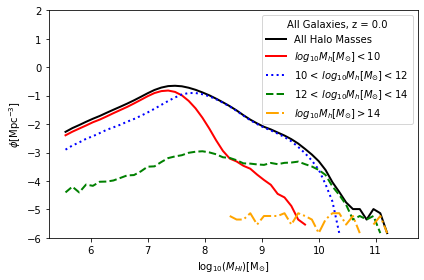

In [5]:
# FULL PLOT FOR DRAGONS, For the different Mvir mass ranges
# ALL GALAXIES
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("All Galaxies, z = " + str(redshift_used))
label_a = ("$log_{10}M_{h}[M_{\odot}] < 10$")
label_b = ("10 < $log_{10}M_{h}[M_{\odot}] < 12$")
label_c = ("12 < $log_{10}M_{h}[M_{\odot}] < 14$")
label_d = ("$log_{10}M_{h}[M_{\odot}] > 14$")
label_All = ("All Halo Masses")

# DRAGONS
# ALL MASSES
x_All = himf[:,0] # HI MASS
y_All = np.log10(himf[:,1]) # HIMF
ax.plot(x_All, y_All, color='black', lw=2,label=label_All)
# MHI Mo <= 10 
x_a = himf_a[:,0] # HI MASS
y_a = np.log10(himf_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='red', lw=2,label=label_a)
# 10 < MHI Mo <= 12
x_b = himf_b[:,0] # HI MASS
y_b = np.log10(himf_b[:,1]) # HIMF
ax.plot(x_b, y_b, color='blue', linestyle='dotted', lw=2,label=label_b)
# 12 < MHI Mo <= 14
x_c = himf_c[:,0] # HI MASS
y_c = np.log10(himf_c[:,1]) # HIMF
ax.plot(x_c, y_c, color='green', linestyle='dashed', lw=2,label=label_c)
# MHI Mo > 14 
x_d = himf_d[:,0] # HI MASS
y_d = np.log10(himf_d[:,1]) # HIMF
ax.plot(x_d, y_d, color='orange', linestyle='dashdot', lw=2,label=label_d)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\phi [{\rm Mpc^{-3}}]$")
ax.set_ylim([-6,2])
# Add the legend
ax.legend(title=label_z, loc="upper right")

''' FOR LEGEND OUTSIDE 
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend([label_All,label_a,label_c,label_c,label_d], loc='center left', bbox_to_anchor=(legend_x, legend_y))
'''
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("AliceHIMF_Mvir_sep_AllGalaxies")
plt.savefig("plots/" + name_of_plot + ".pdf")

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


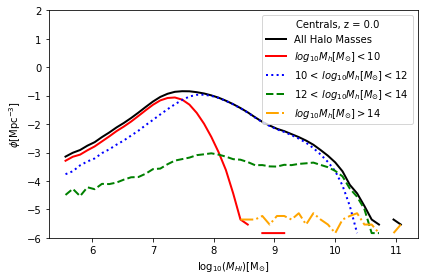

In [6]:
# FULL PLOT FOR DRAGONS, For the different Mvir mass ranges
# CENTRALS ONLY : NOTE [Type==0] 
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("Centrals, z = " + str(redshift_used))
label_a = ("$log_{10}M_{h}[M_{\odot}] < 10$")
label_b = ("10 < $log_{10}M_{h}[M_{\odot}] < 12$")
label_c = ("12 < $log_{10}M_{h}[M_{\odot}] < 14$")
label_d = ("$log_{10}M_{h}[M_{\odot}] > 14$")
label_All = ("All Halo Masses")

# DRAGONS
# ALL MASSES
x_All = himf_Cen[:,0] # HI MASS
y_All = np.log10(himf_Cen[:,1]) # HIMF
ax.plot(x_All, y_All, color='black', lw=2,label=label_All)
# MHI Mo <= 10 
x_a = himf_Cen_a[:,0] # HI MASS
y_a = np.log10(himf_Cen_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='red', lw=2,label=label_a)
# 10 < MHI Mo <= 12
x_b = himf_Cen_b[:,0] # HI MASS
y_b = np.log10(himf_Cen_b[:,1]) # HIMF
ax.plot(x_b, y_b, color='blue', linestyle='dotted', lw=2,label=label_b)
# 12 < MHI Mo <= 14
x_c = himf_Cen_c[:,0] # HI MASS
y_c = np.log10(himf_Cen_c[:,1]) # HIMF
ax.plot(x_c, y_c, color='green', linestyle='dashed', lw=2,label=label_c)
# MHI Mo > 14 
x_d = himf_Cen_d[:,0] # HI MASS
y_d = np.log10(himf_Cen_d[:,1]) # HIMF
ax.plot(x_d, y_d, color='orange', linestyle='dashdot', lw=2,label=label_d)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\phi [{\rm Mpc^{-3}}]$")
ax.set_ylim([-6,2])
# Add the legend
ax.legend(title=label_z, loc="upper right")

''' FOR LEGEND OUTSIDE 
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend([label_All,label_a,label_c,label_c,label_d], loc='center left', bbox_to_anchor=(legend_x, legend_y))
'''
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("AliceHIMF_Mvir_sep_Centrals")
plt.savefig("plots/" + name_of_plot + ".pdf")

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


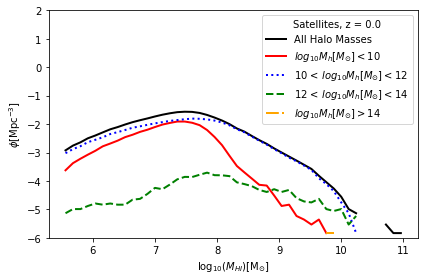

In [7]:
# FULL PLOT FOR DRAGONS, For the different Mvir mass ranges
# CENTRALS ONLY : NOTE [Type==1] 
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("Satellites, z = " + str(redshift_used))
label_a = ("$log_{10}M_{h}[M_{\odot}] < 10$")
label_b = ("10 < $log_{10}M_{h}[M_{\odot}] < 12$")
label_c = ("12 < $log_{10}M_{h}[M_{\odot}] < 14$")
label_d = ("$log_{10}M_{h}[M_{\odot}] > 14$")
label_All = ("All Halo Masses")

# DRAGONS
# ALL MASSES
x_All = himf_Sat[:,0] # HI MASS
y_All = np.log10(himf_Sat[:,1]) # HIMF
ax.plot(x_All, y_All, color='black', lw=2,label=label_All)
# MHI Mo <= 10 
x_a = himf_Sat_a[:,0] # HI MASS
y_a = np.log10(himf_Sat_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='red', lw=2,label=label_a)
# 10 < MHI Mo <= 12
x_b = himf_Sat_b[:,0] # HI MASS
y_b = np.log10(himf_Sat_b[:,1]) # HIMF
ax.plot(x_b, y_b, color='blue', linestyle='dotted', lw=2,label=label_b)
# 12 < MHI Mo <= 14
x_c = himf_Sat_c[:,0] # HI MASS
y_c = np.log10(himf_Sat_c[:,1]) # HIMF
ax.plot(x_c, y_c, color='green', linestyle='dashed', lw=2,label=label_c)
# MHI Mo > 14 
x_d = himf_Sat_d[:,0] # HI MASS
y_d = np.log10(himf_Sat_d[:,1]) # HIMF
ax.plot(x_d, y_d, color='orange', linestyle='dashdot', lw=2,label=label_d)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\phi [{\rm Mpc^{-3}}]$")
ax.set_ylim([-6,2])
# Add the legend
ax.legend(title=label_z, loc="upper right")

''' FOR LEGEND OUTSIDE 
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend([label_All,label_a,label_c,label_c,label_d], loc='center left', bbox_to_anchor=(legend_x, legend_y))
'''
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("AliceHIMF_Mvir_sep_Satellites")
plt.savefig("plots/" + name_of_plot + ".pdf")

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


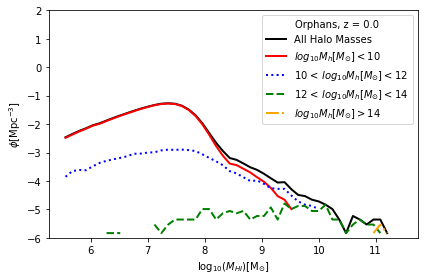

In [8]:
# FULL PLOT FOR DRAGONS, For the different Mvir mass ranges
# ORPHANS ONLY : NOTE [Type==2] 
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("Orphans, z = " + str(redshift_used))
label_a = ("$log_{10}M_{h}[M_{\odot}] < 10$")
label_b = ("10 < $log_{10}M_{h}[M_{\odot}] < 12$")
label_c = ("12 < $log_{10}M_{h}[M_{\odot}] < 14$")
label_d = ("$log_{10}M_{h}[M_{\odot}] > 14$")
label_All = ("All Halo Masses")

# DRAGONS
# ALL MASSES
x_All = himf_Orp[:,0] # HI MASS
y_All = np.log10(himf_Orp[:,1]) # HIMF
ax.plot(x_All, y_All, color='black', lw=2,label=label_All)
# MHI Mo <= 10 
x_a = himf_Orp_a[:,0] # HI MASS
y_a = np.log10(himf_Orp_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='red', lw=2,label=label_a)
# 10 < MHI Mo <= 12
x_b = himf_Orp_b[:,0] # HI MASS
y_b = np.log10(himf_Orp_b[:,1]) # HIMF
ax.plot(x_b, y_b, color='blue', linestyle='dotted', lw=2,label=label_b)
# 12 < MHI Mo <= 14
x_c = himf_Orp_c[:,0] # HI MASS
y_c = np.log10(himf_Orp_c[:,1]) # HIMF
ax.plot(x_c, y_c, color='green', linestyle='dashed', lw=2,label=label_c)
# MHI Mo > 14 
x_d = himf_Orp_d[:,0] # HI MASS
y_d = np.log10(himf_Orp_d[:,1]) # HIMF
ax.plot(x_d, y_d, color='orange', linestyle='dashdot', lw=2,label=label_d)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\phi [{\rm Mpc^{-3}}]$")
ax.set_ylim([-6,2])
# Add the legend
ax.legend(title=label_z, loc="upper right")

''' FOR LEGEND OUTSIDE 
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend([label_All,label_a,label_c,label_c,label_d], loc='center left', bbox_to_anchor=(legend_x, legend_y))
'''
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("AliceHIMF_Mvir_sep_Orphans")
plt.savefig("plots/" + name_of_plot + ".pdf")

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


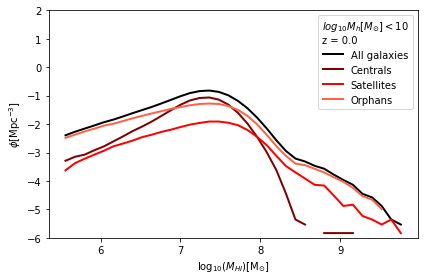

In [9]:
# FULL PLOT FOR DRAGONS, For the different Mvir mass ranges
# ALL TYPES, all MAs range < 10 : NOTE [Type==0] 
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("$log_{10}M_{h}[M_{\odot}] < 10$\nz = " + str(redshift_used))
label_All = ("All galaxies")
label_Cen = ("Centrals")
label_Sat = ("Satellites")
label_Orp = ("Orphans")

# DRAGONS
# ALL
x_a = himf_a[:,0] # HI MASS
y_a = np.log10(himf_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='black', lw=2,label=label_All)
# ORPHANS
x_a = himf_Cen_a[:,0] # HI MASS
y_a = np.log10(himf_Cen_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='maroon', lw=2,label=label_Cen)
# ORPHANS
x_a = himf_Sat_a[:,0] # HI MASS
y_a = np.log10(himf_Sat_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='red', lw=2,label=label_Sat)
# ORPHANS
x_a = himf_Orp_a[:,0] # HI MASS
y_a = np.log10(himf_Orp_a[:,1]) # HIMF
ax.plot(x_a, y_a, color='tomato', lw=2,label=label_Orp)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\phi [{\rm Mpc^{-3}}]$")
ax.set_ylim([-6,2])
# Add the legend
ax.legend(title=label_z, loc="upper right")

''' FOR LEGEND OUTSIDE 
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend([label_All,label_a,label_c,label_c,label_d], loc='center left', bbox_to_anchor=(legend_x, legend_y))
'''
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("AliceHIMF_Mvir_sep_lessthanten")
plt.savefig("plots/" + name_of_plot + ".pdf")